### Klasifikasi busana dari dataset fashion_mnist

In [1]:
import tensorflow
from tensorflow import keras

from matplotlib import pyplot as plt
import numpy as np

Load data

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.fashion_mnist.load_data()

x_train.shape

(60000, 28, 28)

10 kelasnya sebagai berikut

In [3]:
class_names= ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Memplot contoh gambar

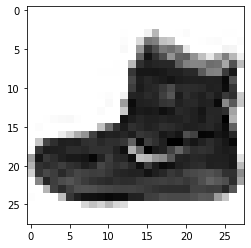

In [4]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

Normalisasi

In [5]:
x_train, x_test= x_train/255, x_test/255

Membuat dan melakukan train pada model

In [6]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(64, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Epochs sampai 20 itu sebenarnya gak beda2 amat dengan 10
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4984 - accuracy: 0.8228
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3701 - accuracy: 0.8646
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3337 - accuracy: 0.8776
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.8857
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.8904
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2805 - accuracy: 0.8957
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.9011
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2572 - accuracy: 0.9028
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2476 - accuracy: 0.9078
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

Evaluasi mode, mendapatkan loss dan akurasi pada data test

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8789


[0.39547276496887207, 0.8788999915122986]

Melakukan prediksi

In [9]:
pred= model.predict(x_test)

In [10]:
np.argmax(pred[0]), y_test[0]

(9, 9)

In [11]:
def fashion_predictions(index):
    global x_test
    global y_test
    global pred
    global class_names
    
    print('Gambar: ')
    plt.matshow(x_test[index], cmap='binary')
    plt.show()
    
    print('Prediksi:', class_names[np.argmax(pred[index])])
    print('Sebenarnya:', class_names[y_test[index]])

Gambar: 


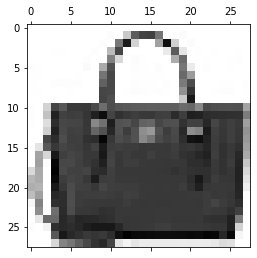

Prediksi: Bag
Sebenarnya: Bag


In [12]:
fashion_predictions(69)